In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Database

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

abs_path_exb = os.environ.get("abs_path_exb")

In [3]:
import sqlite3

# Connect to the database
# https://stackoverflow.com/questions/4636970/sqlite3-operationalerror-unable-to-open-database-file
conn = sqlite3.connect(abs_path_exb) 

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()

## Helper Functions

In [4]:
def get_table(table_name):
    conn = sqlite3.connect(abs_path_exb) 

    cursor = conn.cursor()

    cursor.execute(f"SELECT * FROM {table_name};")
    table = cursor.fetchall()

    cursor.close()
    conn.close()

    return table

In [5]:
import time
import datetime

def get_datetime(evernote_timestamp):
    """
    https://stackoverflow.com/questions/37479884/retrieve-date-from-evernote-date-created-timestamp-field
    """
    return datetime.datetime.fromtimestamp((evernote_timestamp * 86400) - 62135683200)

### Get Tables

In [6]:
len(tables)

39

In [7]:
# set([tbl[0].split("_")[0] for tbl in tables])
print(*[tbl[0] for tbl in tables], sep=" ")

items attrs src_uid src_csn expunged_items tag_attr note_attr notesharednote_attr resource_attr notebook_attr sharednotebook_attr message_attr threadchange_attr thread_attr user_attr identity_attr contact_attr extUser_attr attachment_attr workspace_attr workspacemembership_attr workspaceinvitation_attr resources fts fts_content fts_segments fts_segdir fts_docsize fts_stat fts_aux tasfts tasfts_content tasfts_segments tasfts_segdir tasfts_aux tasfts_terms tastermscxt usage note_usage


## Content Tables

### tag_attr

In [8]:
tag_attr = get_table("tag_attr")
len(tag_attr)

505

In [9]:
tag_attr_df = pd.DataFrame(tag_attr)
tag_attr_df = tag_attr_df.rename({2:"tag",3:"date_created"}, axis=1)

tag_dict = {tag:f"tag_{i}" for i, tag in enumerate(tag_attr_df.tag)}
tag_attr_df.tag = tag_attr_df.tag.map(tag_dict)

tag_attr_df.head(3)

,0,1,tag,date_created,4,5,6,7,8,9,10,11
0,386,435.0,tag_0,737495.889213,737544.855081,-1,None,2.0,1.0,1604.0,None,None
1,415,62668.0,tag_1,737495.889213,737544.857535,-1,None,NaN,NaN,482.0,None,None
2,418,NaN,tag_2,737495.889213,737499.659456,-1,None,2.0,19.0,797.0,None,None


In [10]:
tag_attr_df.iloc[:,3].map(get_datetime).dt.year.value_counts()

date_created
2020    361
2021     76
2022     55
2023     13
Name: count, dtype: int64

### fts

In [11]:
# fts = get_table("fts")
# len(fts)
# # OperationalError: no such module: fts4

In [12]:
fts_content = get_table("fts_content")
len(fts_content)

95023

In [13]:
len(get_table("fts_segments"))

20041

In [14]:
len(get_table("fts_segdir"))

51

In [15]:
len(get_table("fts_docsize"))

95023

In [16]:
len(get_table("fts_stat"))

1

In [17]:
len(get_table("fts_aux"))

95023

### note_attr 

In [18]:
note_attr = get_table("note_attr")
len(note_attr)

18237

In [19]:
note_attr_df = pd.DataFrame(note_attr)
note_attr_df.shape

(18237, 46)

In [20]:
# 1 = title
# 6 = nb_title
# 8 = tag(s)
note_attr_df.head(3).drop([1,6,8],axis=1)

,0,2,3,4,5,7,9,10,11,12,...,36,37,38,39,40,41,42,43,44,45
0,385,None,None,None,NaN,384,736855.601273,738815.542674,NaN,None,...,NaN,None,None,None,None,None,NaN,0,None,5251527
1,414,None,None,None,NaN,384,736853.456065,NaN,NaN,None,...,NaN,None,None,None,None,None,NaN,0,None,350065
2,417,None,None,None,NaN,384,736853.455544,NaN,NaN,None,...,NaN,None,None,None,None,None,NaN,0,None,26518


### Tags over Time

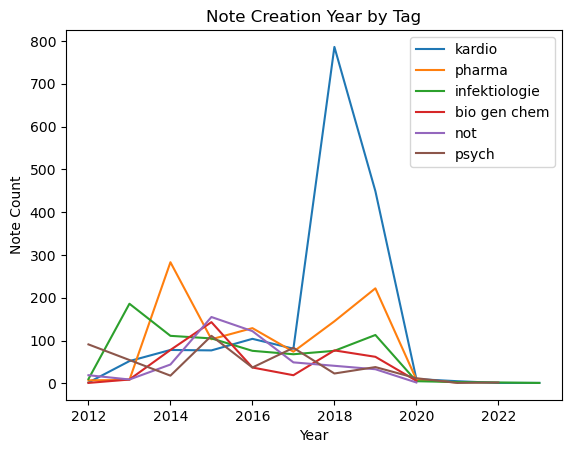

In [21]:
plt.title("Note Creation Year by Tag")
# note_attr_df.iloc[:,9].map(get_datetime).dt.year.value_counts().sort_index().plot(label="total")
for tag in ["kardio", "pharma", "infektiologie", "bio gen chem", "not", "psych"]:
    note_attr_df[note_attr_df[8].str.contains(tag).fillna(False)].iloc[:,9].map(get_datetime).dt.year.value_counts().sort_index().plot(label=tag)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Note Count")
plt.show()

### tas

In [22]:
# len(get_table("tasfts"))
# # OperationalError: no such module: fts3

In [23]:
tasfts_content = get_table("tasfts_content")
len(tasfts_content)

18215

In [24]:
tasfts_segments = get_table("tasfts_segments")
len(tasfts_segments)

21418

In [25]:
tasfts_segdir = get_table("tasfts_segdir")
len(tasfts_segdir)

35

In [26]:
tasfts_aux = get_table("tasfts_aux")
len(tasfts_aux)

18215

In [27]:
tasfts_aux[:3]

[(414,), (419,), (420,)]

In [28]:
# len(get_table("tasfts_terms"))
# # OperationalError: no such module: fts4aux

In [29]:
# len(get_table("tastermscxt"))
# # OperationalError: no such module: fts3tasterms

## Other Tables

### items

In [30]:
items = get_table("items")
len(items)

64027

In [31]:
items[1000]

(1013, None, 1, 31)

### attrs

In [32]:
attrs = get_table("attrs")
len(attrs)

585301

In [33]:
attrs[1000]

(405, 102, 2, 30, b'image/png\x00')

### src_uid 

In [34]:
src_uid = get_table("src_uid")
len(src_uid)

1

In [35]:
src_uid

[(79160,)]

### src_csn

In [36]:
src_csn = get_table("src_csn ")
len(src_csn)

1

In [37]:
src_csn

[(27158,)]

### expunged_items 

In [38]:
expunged_items = get_table("expunged_items ")
len(expunged_items)

10

### notesharednote_attr

In [39]:
notesharednote_attr = get_table("notesharednote_attr")
len(notesharednote_attr)

0

### resource_attr

In [40]:
resource_attr = get_table("resource_attr")
len(resource_attr)

44797

In [41]:
resource_attr_df = pd.DataFrame(resource_attr)
resource_attr_df[3].value_counts()

3
image/png        36421
image/jpeg        7425
image/gif          949
image/svg+xml        2
Name: count, dtype: int64

### notebook_attr

In [42]:
notebook_attr = get_table("notebook_attr")
len(notebook_attr)

7

In [43]:
notebook_attr_df = pd.DataFrame(notebook_attr)
notebook_attr_df = notebook_attr_df.rename({1:"nb_title", 11:"notes_count"}, axis=1)
nb_title_dict = {title:f"nb_title_{i}" for i, title in enumerate(notebook_attr_df.nb_title)}
notebook_attr_df.nb_title = notebook_attr_df.nb_title.map(nb_title_dict)
notebook_attr_df[notebook_attr_df.columns[:15]].T

,0,1,2,3,4,5,6
0,384,61869,66057,74470,74472,74474,79105
nb_title,nb_title_0,nb_title_1,nb_title_2,nb_title_3,nb_title_4,nb_title_5,nb_title_6
2,,,None,None,None,None,None
3,NaN,5509120.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2.0,NaN,NaN,NaN,NaN,NaN
5,2.0,1.0,2.0,2.0,2.0,2.0,NaN
6,737495.889213,737496.695023,737569.811134,738372.743912,738372.744016,738372.749606,738674.545556
7,737953.87066,737569.810972,NaN,738372.747257,738372.747523,NaN,NaN
8,738799.163553,738728.392176,738797.154201,738785.386354,738538.72412,738469.384965,738785.386262
9,-1,-1,-1,-1,-1,-1,-1


### sharednotebook_attr

In [44]:
sharednotebook_attr = get_table("sharednotebook_attr")
len(sharednotebook_attr)

0

### message_attr

In [45]:
message_attr = get_table("message_attr")
len(message_attr)

0

### threadchange_attr

In [46]:
threadchange_attr = get_table("threadchange_attr")
len(threadchange_attr)

0

### thread_attr

In [47]:
thread_attr = get_table("thread_attr")
len(thread_attr)

0

### User

#### user_attr

In [48]:
user_attr = get_table("user_attr")
len(user_attr)

1

#### identity_attr

In [49]:
identity_attr = get_table("identity_attr")
len(identity_attr)

1

#### contact_attr

In [50]:
contact_attr = get_table("contact_attr")
contact_attr

[]

#### extUser_attr

In [51]:
extUser_attr = get_table("extUser_attr")
extUser_attr

[]

### attachment_attr

In [52]:
attachment_attr = get_table("attachment_attr")
attachment_attr

[]

### workspace_attr

In [53]:
workspace_attr = get_table("workspace_attr")
workspace_attr

[]

### workspacemembership_attr

In [54]:
workspacemembership_attr = get_table("workspacemembership_attr")
workspacemembership_attr

[]

### workspaceinvitation_attr

In [55]:
workspaceinvitation_attr = get_table("workspaceinvitation_attr")
workspaceinvitation_attr

[]

### resources

In [56]:
conn = sqlite3.connect(abs_path_exb) 

cursor = conn.cursor()

cursor.execute(f"SELECT COUNT(1) FROM resources LIMIT 3;")
len_resources = cursor.fetchall()

cursor.close()
conn.close()

In [57]:
len_resources[0][0]

43753

### usage

In [58]:
usage = get_table("usage")
len(usage)

5680

In [59]:
usage[:3]

[(70798836,), (70798839,), (70799604,)]

In [60]:
note_usage = get_table("note_usage")
len(note_usage)

17062

In [61]:
note_usage[:3]

[(380, 737495.9254513889), (382, 737499.7811921296), (384, 737534.7960300926)]

## Summary
[sqlite.org/datatype3.html](https://www.sqlite.org/datatype3.html)
* encoding UTF-8 UTF-16BE UTF-16LE
* time in seconds since 1970-01-01 00:00:00 UTC
* 39 tables